In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import os
import sys
sys.path.append('..')

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
! pip install imutils

In [3]:
from imutils import paths

In [6]:
os.getcwd()

'/home/jovyan/Vivian_1070926/Yunzy'

In [5]:
os.chdir('/home/jovyan/Vivian_1070926/Yunzy')

In [7]:
a={'dent':0, 'leeton':1, 'pimple':2, 'residual':3, 'scratch_M':4, 'spot_M':5, 'foreign':6,\
   'longscratch_M':7, 'pinhole':8, 'scratch':9, 'spot':10, 'wrinkle':11}

In [8]:
CLASS_NUM =12

In [9]:
data=[]
labels=[]
imagePaths = sorted(list(paths.list_images("1121aug_12types_100x100/")))
random.seed(42)
random.shuffle(imagePaths)
for sub in imagePaths:
        label = sub.split(os.path.sep)[1] 
        if label[0] == ".":
            continue
        labels.append(a[label])
        image = Image.open(sub)
        try:
            image = image.resize((100, 100))
        except:
            print(image)
        image = img_to_array(image)
        data.append(image)
#     data = np.array(data, dtype="float") / 255.0
#     labels = np.array(labels)        
#     (trainX, testX, trainY, testY) = train_test_split(data,\
#             labels, test_size=0.2, random_state=42)      
#     #(trainX, valX, trainY, valY) = train_test_split(trainX,\
#             #trainY, test_size=0.25, random_state=42)
#     trainY = to_categorical(trainY, num_classes=CLASS_NUM)
#     testY = to_categorical(testY, num_classes=CLASS_NUM)
#     #valY = to_categorical(valY, num_classes=CLASS_NUM)
    

In [10]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)        

In [11]:
(trainX, testX, trainY, testY) = train_test_split(data,\
            labels, test_size=0.2, random_state=42)      
# (trainX, valX, trainY, valY) = train_test_split(trainX,\
#             trainY, test_size=0.25, random_state=42)

In [12]:
trainY = to_categorical(trainY, num_classes=CLASS_NUM)
testnewY = to_categorical(testY, num_classes=CLASS_NUM)
#valY = to_categorical(valY, num_classes=CLASS_NUM)


In [13]:
print(trainX.shape, trainY.shape, testX.shape, testnewY.shape)

(16497, 100, 100, 3) (16497, 12) (4125, 100, 100, 3) (4125, 12)


In [21]:
from keras.applications import Xception  #引入能夠架 Xception 的類別
from keras import models
from keras import layers
conv_base = Xception(weights="imagenet",include_top=False,input_shape=(100,100,3)) # 架 Xception
model = models.Sequential() # 建一個空的模型
model.add(conv_base) # 把前面架好的 Xception 放進模型
model.add(layers.Flatten()) # 把 Xception 抽取出的圖片特徵攤平
model.add(layers.Dense(256,activation="relu",kernel_initializer='random_normal')) # 再來就是通過幾層 Dense 來做分類
model.add(layers.Dropout(0.3)) # 加 Dropout 避免 overfitting
model.add(layers.Dense(128,activation="relu",kernel_initializer='random_normal'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(12,activation="softmax",kernel_initializer='random_normal'))

In [22]:
datagen = ImageDataGenerator(width_shift_range=0.01,\
                             height_shift_range=0.01,shear_range=0.005,zoom_range=0.005,horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(trainX)

In [23]:
#checkpoint 在每个训练期之后保存模型。
#checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='loss', patience=8, verbose=1)

In [24]:
#optimizer = keras.optimizers.Adam(lr=10e-6)
#steps_per_epoch 越大一個epoch越慢跑完
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
# fits the model on batches with real-time data augmentation: # 用前面建好的 generator 做訓練
model_history = model.fit_generator(datagen.flow(trainX, trainY, batch_size=32), steps_per_epoch=100, epochs = 100,\
                                    callbacks = [earlystop]) 

Epoch 1/100
100/100 [==============================] - 20s 195ms/step - loss: 1.1402 - acc: 0.6828
Epoch 2/100
100/100 [==============================] - 10s 98ms/step - loss: 0.6770 - acc: 0.8247
Epoch 3/100
100/100 [==============================] - 10s 100ms/step - loss: 0.5344 - acc: 0.8617
Epoch 4/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4531 - acc: 0.8872
Epoch 5/100
100/100 [==============================] - 10s 98ms/step - loss: 0.3619 - acc: 0.8981
Epoch 6/100
100/100 [==============================] - 10s 98ms/step - loss: 0.3777 - acc: 0.8937
Epoch 7/100
100/100 [==============================] - 10s 101ms/step - loss: 0.3508 - acc: 0.9106
Epoch 8/100
100/100 [==============================] - 10s 101ms/step - loss: 0.2699 - acc: 0.9203
Epoch 9/100
100/100 [==============================] - 10s 100ms/step - loss: 0.3228 - acc: 0.9135
Epoch 10/100
100/100 [==============================] - 10s 102ms/step - loss: 0.2672 - acc: 0.9231
Epoch 11/100


In [2]:
training_loss = model_history.history['loss']
#val_loss = model_history1.history['val_loss']

plt.plot(training_loss, label="training_loss")
#plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

NameError: name 'model_history1' is not defined

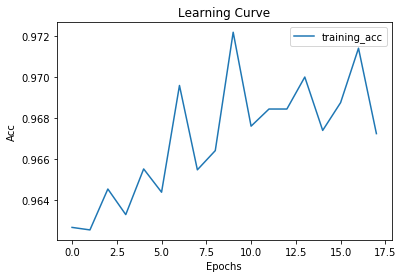

In [27]:
training_acc = model_history.history['acc']
#val_acc = model_history1.history['val_acc']

plt.plot(training_acc, label="training_acc")
#plt.plot(val_acc, label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

## 再來我們可以將之前凍住的CNN部分，只讓後面幾層跟著訓練，對模型做到 Fine-tuning 的效果，要注意的是優化器的 learning rate 要調小一點，不然模型可能會 train 壞掉。

In [25]:
from keras.optimizers import Adam

conv_base.trainable = True # 先將整塊 CNN 部分變成 trainable
for index, layer in enumerate(conv_base.layers):
    if(index < len(conv_base.layers) * 0.8):
        layer.trainable = False # 再來將前 80% 的層凍住，這樣就只有後面的層會 train 到
    else:
        break
adam = Adam(lr = 0.00001) #將 adam 的 learning rate 調小
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["acc"])
model_history1= model.fit_generator(datagen.flow(trainX, trainY, batch_size=32),steps_per_epoch=200,\
                                    epochs=100,callbacks = [earlystop]) # 用前面建好的 generator 做訓練

Epoch 1/100
200/200 [==============================] - 17s 83ms/step - loss: 0.1211 - acc: 0.9627
Epoch 2/100
200/200 [==============================] - 13s 64ms/step - loss: 0.1272 - acc: 0.9621
Epoch 3/100
200/200 [==============================] - 13s 64ms/step - loss: 0.1143 - acc: 0.9645
Epoch 4/100
200/200 [==============================] - 12s 62ms/step - loss: 0.1123 - acc: 0.9633
Epoch 5/100
200/200 [==============================] - 12s 61ms/step - loss: 0.1089 - acc: 0.9656
Epoch 6/100
200/200 [==============================] - 12s 62ms/step - loss: 0.1202 - acc: 0.9644
Epoch 7/100
200/200 [==============================] - 13s 63ms/step - loss: 0.0989 - acc: 0.9694
Epoch 8/100
200/200 [==============================] - 13s 64ms/step - loss: 0.1102 - acc: 0.9655
Epoch 9/100
200/200 [==============================] - 13s 64ms/step - loss: 0.1138 - acc: 0.9664
Epoch 10/100
200/200 [==============================] - 12s 62ms/step - loss: 0.0917 - acc: 0.9722
Epoch 11/100
200/20

In [2]:
training_loss = model_history1.history['loss']
#val_loss = model_history1.history['val_loss']

plt.plot(training_loss, label="training_loss")
#plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

NameError: name 'model_history1' is not defined

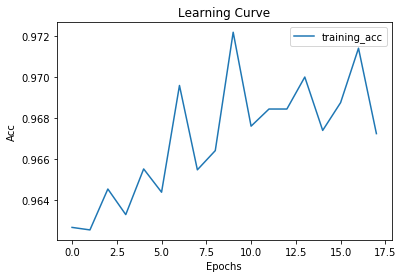

In [27]:
training_acc = model_history1.history['acc']
#val_acc = model_history1.history['val_acc']

plt.plot(training_acc, label="training_acc")
#plt.plot(val_acc, label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [28]:
model.save("7th.h5")

In [17]:
os.getcwd()

'/home/jovyan/Vivian_1070926/Yunzy/model_save'

In [16]:
os.chdir('/home/jovyan/Vivian_1070926/Yunzy/model_save')

In [18]:
from keras.models import load_model
model = load_model('7th.h5')

In [19]:
scores = model.evaluate(testX, testnewY, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])

4125/4125 [==============================] - 5s 1ms/step
Validation loss: 0.09639608038600647
Validation accuracy: 0.9692121210820747


from keras.models import load_model
model_history1 = load_model("2nd.h5")

In [20]:
prediction = model.predict_classes(testX)
prediction

array([ 9, 11,  8, ...,  2,  1,  5])

# testY必須是在onehot升維前的數字

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testY, prediction)

array([[235,   2,   1,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  2, 265,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0, 268,   5,  20,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,   6, 211,   5,   0,   3,  19,   0,   0,   0,   1],
       [  0,   0,   8,   3, 264,   0,   0,  11,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 295,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 237,   0,   0,   0,   0,   0],
       [  0,   0,   1,   5,   6,   0,   0, 458,   0,   0,   0,   7],
       [  0,   0,   0,   0,   0,   0,   0,   0, 265,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0, 256,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 288,   4],
       [  0,   0,   0,   0,   0,   0,   1,   8,   0,   0,   0, 956]])